In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
# Upload the image
uploaded = files.upload()


Saving images (2) 22.jfif to images (2) 22.jfif


In [ ]:
# Load the image (use the uploaded filename)
image = cv2.imread(next(iter(uploaded)))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
# Preprocess the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

In [ ]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
 #Draw contours and detect defects
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Adjust area threshold based on defect size
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, "Defect", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)


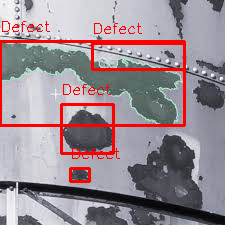

In [ ]:
# Show the result in Colab
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()